<a href="https://colab.research.google.com/github/evanjenkins7/CS461/blob/main/Program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

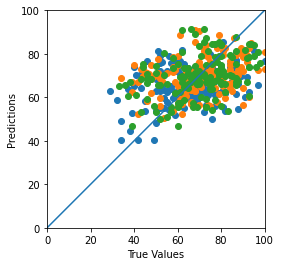

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

#*****Uncomment to get open file menu for upload*****
#from google.colab import files 
#uploaded = files.upload()


#create dataset from CSV input
dataset = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
dataset.head()

#one-hot code non-numerical values
dataset = pd.get_dummies(dataset, columns=['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course'])
dataset.tail()

#separate dataset into 70/15/15 for Train/Test/Validation
train_dataset = dataset.sample(frac=0.7, random_state=69)
rest = dataset.drop(train_dataset.index)
test_dataset = rest.sample(frac=0.5, random_state=69)
validation_dataset = rest.drop(test_dataset.index)

#isolate input and output data into features and labels accordingly
train_features = train_dataset.copy()
test_features = test_dataset.copy()
validation_features = validation_dataset.copy()

math_score = train_features.pop('math score')
reading_score = train_features.pop('reading score')
writing_score = train_features.pop('writing score')
train_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = test_features.pop('math score')
reading_score = test_features.pop('reading score')
writing_score = test_features.pop('writing score')
test_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = validation_features.pop('math score')
reading_score = validation_features.pop('reading score')
writing_score = validation_features.pop('writing score')
validation_labels = np.array([math_score, reading_score, writing_score]).transpose()

#generate normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

#get model function to create model
def get_model(normalizer):
    model = keras.Sequential(
    [
      normalizer,
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(3, activation="relu"),
    ])
    model.compile(loss='mae', optimizer=tf.optimizers.Adam(learning_rate=0.001))
    return model

#creation of model
model = get_model(normalizer)

#train model
history = model.fit(
    train_features,
    train_labels,
    validation_data=(validation_features, validation_labels),
    epochs=100,
    verbose=0)

#evaluate mean average error and predictions
mae = model.evaluate(test_features, test_labels, verbose=0)
test_predictions = model.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[0], test_predictions.transpose()[0])
plt.scatter(test_labels.transpose()[1], test_predictions.transpose()[1])
plt.scatter(test_labels.transpose()[2], test_predictions.transpose()[2])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
